In [25]:
# Preamble
from model import FractionMLP
from training_defs import load_csv, test_train_split
import matplotlib.pyplot as plt
import torch

In [26]:
# Variables
input_size = 210 # 400-2490 nm (10 nm intervals)
hidden_size = 16 # Arbitrary
output_size = 3 # GV, NPV, soil

In [27]:
# NN setup
model = FractionMLP(input_size, hidden_size, output_size)
print(model.W1.dtype)

torch.float64


In [28]:
# This is my personal filepath. Change filepath for testing
#raw_data = load_csv('filepath')
raw_data = load_csv("/Users/galacticmilk/Desktop/Michael's folder/[UNI]/[UTAT]/[science]/FINCH-Science_SyntheticData/data/simpler_data_rwc.csv")

In [29]:
train_input, train_output, test_input, test_output = test_train_split(raw_data)
print(train_input.dtype)

torch.float64


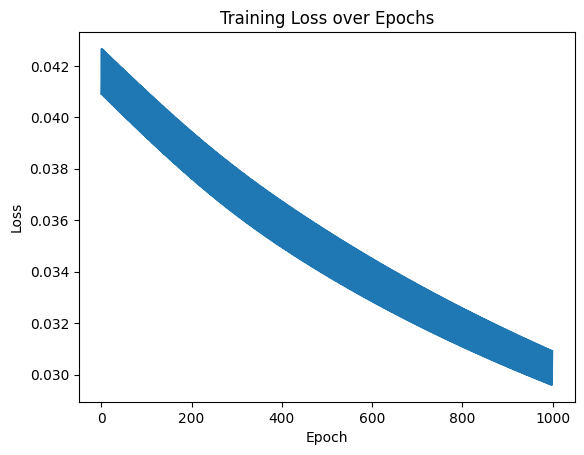

Test Accuracy: 13.28%


In [32]:
#Train the model, store loss
losses = model.train(train_input, train_output, epochs=1000, lr=0.1)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

with torch.no_grad():
    t_output = model.forward(test_input)
    # t_output = (t_output > 0.5).float() 
# accuracy = torch.mean((t_output == test_output).float())
accuracy = torch.mean(abs(t_output - test_output).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

In [31]:
print(t_output[0])
print(test_output[0])

tensor([0.0688, 0.4193, 0.4654], dtype=torch.float64)
tensor([0.0769, 0.4615, 0.4615], dtype=torch.float64)
